<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MachineLearning/ControllerForGamesCharacters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<center>Нейроконтроллер для персонажей компьютерных игр<center/>**
**Цель**: поистроить нейронную сеть для управления поведением персонажа компьютерной игры в зависимости от обстановки окружающей среды

**Задания:**
1. Описание исходных данных.

2. Подготовка данных для работы с нейронной сетью.

3. Построение модели нейронной сети и ее визуализация.
Визуализация процесса обучения модели.

4. Проверка модели на тестовом наборе данных. Выводы.

5. Построение моделей нейронной сети с разными функциями активации. Сравнение
полученных результатов при проверке моделей на тестовых выборках. Выбор
наилучшего варианта.

6. Исследование функций потерь и метрик по графикам в процессе обучения.



In [ ]:
# необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation

# Загрузка данных

In [ ]:
data_train = pd.read_csv("data_train.csv")
data_train.head()

,2,0,0.1,0.2,dodge
0,2,0,0,1,dodge
1,2,0,1,1,attack
2,2,0,1,2,attack
3,2,1,0,2,hide
4,2,1,0,1,attack


In [ ]:
data_test = pd.read_csv("data_test.csv")
data_test.head()

,2,1,1.1,1.2,attack
0,1,1,1,2,hide
1,0,0,0,0,dodge
2,0,1,1,1,hide
3,2,0,1,3,hide
4,2,1,0,3,hide


# Создание обучающей и тестовой выборки

In [ ]:
X_train = data_train.iloc[:, 0:4]
print(X_train)

y_train = data_train.select_dtypes(include = [object])
print(y_train)

    2  0  0.1  0.2
0   2  0    0    1
1   2  0    1    1
2   2  0    1    2
3   2  1    0    2
4   2  1    0    1
5   1  0    0    0
6   1  0    0    1
7   1  0    1    1
8   1  0    1    2
9   1  1    0    2
10  1  1    0    1
11  0  0    0    0
12  0  0    0    1
13  0  0    1    1
14  0  0    1    2
15  0  1    0    2
16  0  1    0    1
     dodge
0    dodge
1   attack
2   attack
3     hide
4   attack
5    dodge
6     hide
7   attack
8     hide
9     hide
10    hide
11   dodge
12    hide
13    hide
14     run
15     run
16    hide


In [ ]:
y_train.dodge.unique()

array(['dodge', 'attack', 'hide', 'run'], dtype=object)

In [ ]:
X_test = data_test.iloc[:, 0:4]
print(X_train)

y_test = data_test.select_dtypes(include = [object])
print(y_test)

    2  0  0.1  0.2
0   2  0    0    1
1   2  0    1    1
2   2  0    1    2
3   2  1    0    2
4   2  1    0    1
5   1  0    0    0
6   1  0    0    1
7   1  0    1    1
8   1  0    1    2
9   1  1    0    2
10  1  1    0    1
11  0  0    0    0
12  0  0    0    1
13  0  0    1    1
14  0  0    1    2
15  0  1    0    2
16  0  1    0    1
  attack
0   hide
1  dodge
2   hide
3   hide
4   hide
5    run


In [ ]:
y_test.attack.unique()

array(['hide', 'dodge', 'run'], dtype=object)

# Преобразование категориальных признаков в числа

In [ ]:
le = preprocessing.LabelEncoder()

train_labels2 = y_train.apply(le.fit_transform) # для обучающей выборки можно чрез fit_transform
le.fit(y_train.dodge.unique())
test_labels2 = le.transform(y_test) # а для в тестовой только 3 уникальных значения и в другом порядке, поэтому для совпадения
#пар категориальный признак - цифра кидаем в качестве категорий в le уникальные значения из тренировочной выборки
print(train_labels2)
print(test_labels2)

    dodge
0       1
1       0
2       0
3       2
4       0
5       1
6       2
7       0
8       2
9       2
10      2
11      1
12      2
13      2
14      3
15      3
16      2
[2 1 2 2 2 3]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


# Из преобразованных в числа признаков делаем вектора

In [ ]:
train_labels = to_categorical(train_labels2)
test_labels = to_categorical(test_labels2, 4) #уточняем размер, для того, чтобы вектора для теста были 4хмерными,
# несмотря на наличие только 3 уникальных признаков в них
print(train_labels)
print(test_labels)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


# Построение модели нейронной сети функциями активации как в примере

Используемые функции активации:
В скрытом слое - relu:
$$
f(z)=\max (0, z)
$$
Softmax выглядит следующим образом (выходной слой):
$$
\sigma(z)_i=\frac{e^{z_i}}{\sum_{k=1}^K e^{z_k}}
$$

In [ ]:
model = models.Sequential([
    Dense(3, input_shape=(4,)), # в скрытом слое 3 нейрона и на вход идет 4 значения
    Activation('relu'),
    Dense(4), # в выходном слое - 4 нейрона
    Activation ('softmax')
])

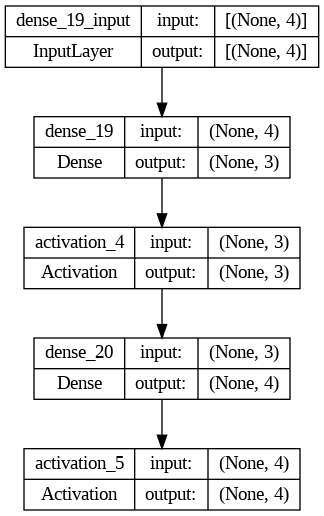

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True) # информация о модели нейронки в виде картинки png

In [ ]:
model.summary() # параметры нейронки

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 3)                 15        
                                                                 
 activation_4 (Activation)   (None, 3)                 0         
                                                                 
 dense_20 (Dense)            (None, 4)                 16        
                                                                 
 activation_5 (Activation)   (None, 4)                 0         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


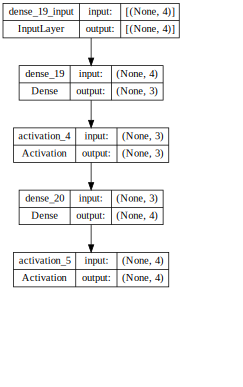

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

В качестве **функции потерь** используется categorical_crossentropy

* binary_crossentropy: используется как функция потерь для модели
бинарной классификации. Функция binary_crossentropy вычисляет потерю кросс-энтропии между истинными метками и предсказанными метками.
* categorical_crossentropy: используется в качестве функции потерь для модели классификации с несколькими классами, где есть две или более выходных метки. Выходной метке присваивается значение кодирования одной горячей категории в форме 0 и 1. Выходная метка, если она присутствует в целочисленной форме, преобразуется в категориальное кодирование с использованием метода keras.utils to_categorical.
* sparse_categorical_crossentropy: используется в качестве функции потерь для модели классификации с несколькими классами, где выходной метке присваивается целочисленное значение (0, 1, 2, 3…). Эта функция потерь математически такая же, как categorical_crossentropy. Просто у него другой интерфейс.

**Метрика** - accuracy

Вычисляет, как часто прогнозы совпадают с метками.

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # компиляция модели

In [ ]:
history=model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=500, batch_size=1) # обучение нейронки

Epoch 1/500
17/17 [==============================] - 1s 15ms/step - loss: 1.3730 - accuracy: 0.1176 - val_loss: 1.2381 - val_accuracy: 0.5000
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2418 - accuracy: 0.4118 - val_loss: 1.1491 - val_accuracy: 0.6667
Epoch 3/500
17/17 [==============================] - 0s 4ms/step - loss: 1.1331 - accuracy: 0.4706 - val_loss: 1.0400 - val_accuracy: 0.8333
Epoch 4/500
17/17 [==============================] - 0s 5ms/step - loss: 1.0514 - accuracy: 0.5294 - val_loss: 0.9312 - val_accuracy: 0.8333
Epoch 5/500
17/17 [==============================] - 0s 4ms/step - loss: 1.0081 - accuracy: 0.5882 - val_loss: 0.9179 - val_accuracy: 0.6667
Epoch 6/500
17/17 [==============================] - 0s 4ms/step - loss: 0.9725 - accuracy: 0.6471 - val_loss: 0.7518 - val_accuracy: 0.8333
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 0.9011 - accuracy: 0.7059 - val_loss: 0.6733 - val_accuracy: 0.8333
Epoch 8/500


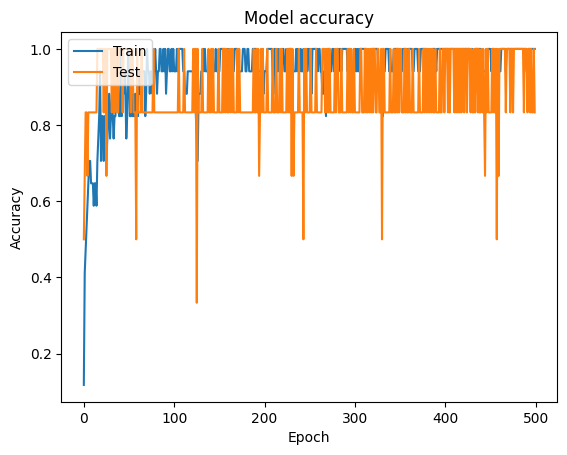

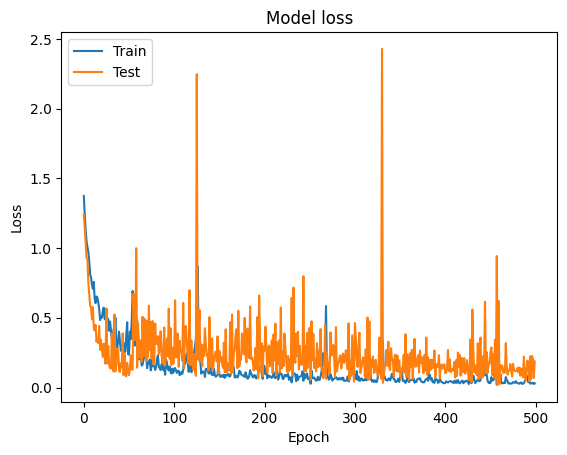

1/1 [==============================] - 0s 71ms/step
[[0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]]
[2 1 2 2 2 3]


In [ ]:
# Plot training & validation accuracy values
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model.predict(X_test) > 0.5).astype("int32")
print(ynew)
print(test_labels2)

# Построение модели нейронной сети с сигмоидами в качестве функций активации

**Функции активации** (и для скрытого и для выходного слоя) - сигмоиды:
$$
\begin{gathered}
f(x)=\frac{1}{1+e^{-x}} \end{gathered}
$$

In [ ]:
model1 = models.Sequential([
    Dense(3, input_shape=(4,)),
    Activation('sigmoid'),
    Dense(4),
    Activation ('sigmoid')
])

В качестве **функции потерь** используется, как и в модели model из примера categorical_crossentropy

* binary_crossentropy: используется как функция потерь для модели
бинарной классификации. Функция binary_crossentropy вычисляет потерю кросс-энтропии между истинными метками и предсказанными метками.
* categorical_crossentropy: используется в качестве функции потерь для модели классификации с несколькими классами, где есть две или более выходных метки. Выходной метке присваивается значение кодирования одной горячей категории в форме 0 и 1. Выходная метка, если она присутствует в целочисленной форме, преобразуется в категориальное кодирование с использованием метода keras.utils to_categorical.
* sparse_categorical_crossentropy: используется в качестве функции потерь для модели классификации с несколькими классами, где выходной метке присваивается целочисленное значение (0, 1, 2, 3…). Эта функция потерь математически такая же, как categorical_crossentropy. Просто у него другой интерфейс.

**Метрика** - accuracy

Вычисляет, как часто прогнозы совпадают с метками.

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model1.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=500, batch_size=1)

Epoch 1/500
17/17 [==============================] - 1s 15ms/step - loss: 1.4061 - accuracy: 0.2353 - val_loss: 1.3277 - val_accuracy: 0.5000
Epoch 2/500
17/17 [==============================] - 0s 4ms/step - loss: 1.1986 - accuracy: 0.6471 - val_loss: 1.0767 - val_accuracy: 0.6667
Epoch 3/500
17/17 [==============================] - 0s 4ms/step - loss: 1.2231 - accuracy: 0.4706 - val_loss: 0.9753 - val_accuracy: 0.6667
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 1.1855 - accuracy: 0.4706 - val_loss: 1.0342 - val_accuracy: 0.6667
Epoch 5/500
17/17 [==============================] - 0s 4ms/step - loss: 1.1831 - accuracy: 0.4706 - val_loss: 1.0280 - val_accuracy: 0.6667
Epoch 6/500
17/17 [==============================] - 0s 4ms/step - loss: 1.1634 - accuracy: 0.5294 - val_loss: 1.0941 - val_accuracy: 0.6667
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 1.1469 - accuracy: 0.6471 - val_loss: 1.0386 - val_accuracy: 0.6667
Epoch 8/500


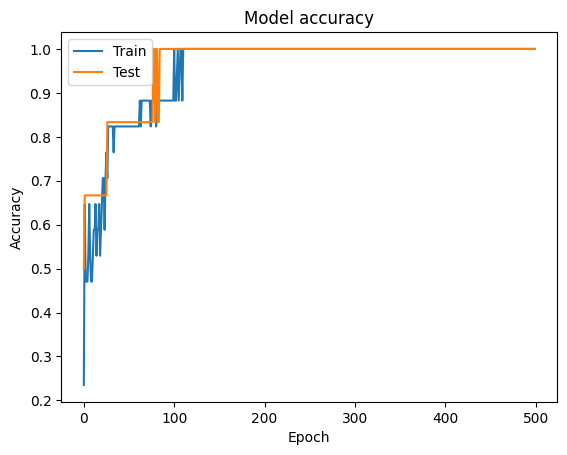

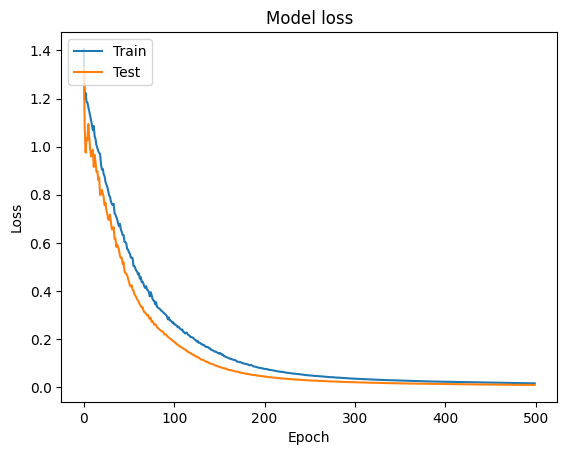

1/1 [==============================] - 0s 86ms/step
[[0 0 1 0]
 [0 1 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 1]]
[2 1 2 2 2 3]


In [ ]:
# Plot training & validation accuracy values
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model1.predict(X_test) > 0.5).astype("int32")
print(ynew)
print(test_labels2)

# **Вывод**

Построена нейронная сеть с 4 входами, 3 нейронами в скрытом слое и 4 нейроном в выходном слое для определения лучшего поведения перв\сонажа в игре в текущих условиях.

Сначала построена модель model по примеру, где в качестве функции активации в скрытом слое использовалась softmax, а в выходном - relu

Затем модель model1, с сигмоидами в качестве функций активации.

Затем нейронные сети были обучены. Расчет потерь осуществлялся с помощью categorical_crossentropy, в качестве метрики выбиралась точность.

Как видно их визуализации процесса обучения потери у model1 меньше, а точность лучше. Уже после 100 эпох точность достигает значения 1, в то время как для model точность скачет после 100 эпох между значениями 0.8 и 1 с редкими скачками.